In [1]:
library("pracma")

In [2]:
source("select_file_csv.R")
source("plot_morphology_matrix.R")

In [5]:
csvFileName <- "./data/morphologyMatrix_DG_Atlas_V3_20181206114005.csv"
plotLabel <- "Atlas_V3"

In [6]:
cells <- read.csv(file=csvFileName, header=TRUE, sep=",")
print(cells)

                  X DG.SM DG.SG DG.H CA3 CA2 CA1 SUB
1     AA0091_DG.swc     2     2    1   1   0   0   0
2     AA0143_DG.swc     2     3    0   1   0   0   0
3     AA0144_DG.swc     3     1    0   1   0   0   0
4     AA0145_DG.swc     2     1    0   1   0   0   0
5     AA0146_DG.swc     2     1    1   1   0   0   0
6     AA0147_DG.swc     2     1    1   1   0   0   0
7     AA0148_DG.swc     2     3    0   1   0   0   0
8     AA0149_DG.swc     2     3    1   1   0   0   0
9     AA0150_DG.swc     2     3    3   1   0   0   0
10    AA0151_DG.swc     2     3    0   1   0   0   0
11    AA0154_DG.swc     2     1    0   1   0   0   0
12    AA0155_DG.swc     2     3    1   1   0   0   0
13    AA0156_DG.swc     2     3    0   1   0   0   0
14    AA0162_DG.swc     2     1    0   1   0   0   0
15    AA0165_DG.swc     2     1    0   1   0   0   0
16    AA0166_DG.swc     2     1    0   1   0   0   0
17    AA0189_DG.swc     3     1    0   1   0   0   0
18    AA0191_DG.swc     3     1    0   1   0  

In [7]:
nRows <- nrow(cells)
nColumns <- ncol(cells)

In [8]:
neuronLabels <- cells[1:nRows,1]
print(neuronLabels)

 [1] AA0091_DG.swc    AA0143_DG.swc    AA0144_DG.swc    AA0145_DG.swc   
 [5] AA0146_DG.swc    AA0147_DG.swc    AA0148_DG.swc    AA0149_DG.swc   
 [9] AA0150_DG.swc    AA0151_DG.swc    AA0154_DG.swc    AA0155_DG.swc   
[13] AA0156_DG.swc    AA0162_DG.swc    AA0165_DG.swc    AA0166_DG.swc   
[17] AA0189_DG.swc    AA0191_DG.swc    AA0192_DG.swc    AA0193_DG.swc   
[21] AA0196_DG.swc    AA0197_DG.swc    AA0198_DG.swc    AA0202_DG.swc   
[25] AA0305_DG-mo.swc AA0360_DG-sg.swc AA0361_DG-sg.swc AA0362_DG-sg.swc
[29] AA0484_DG-sg.swc AA0487_DG-sg.swc
30 Levels: AA0091_DG.swc AA0143_DG.swc AA0144_DG.swc ... AA0487_DG-sg.swc


In [9]:
parcelLabels <- colnames(cells)
parcelLabels <- parcelLabels[2:nColumns]
print(parcelLabels)

[1] "DG.SM" "DG.SG" "DG.H"  "CA3"   "CA2"   "CA1"   "SUB"  


In [10]:
morphologyMatrix <- cells[1:nRows,2:nColumns]
print(morphologyMatrix)

   DG.SM DG.SG DG.H CA3 CA2 CA1 SUB
1      2     2    1   1   0   0   0
2      2     3    0   1   0   0   0
3      3     1    0   1   0   0   0
4      2     1    0   1   0   0   0
5      2     1    1   1   0   0   0
6      2     1    1   1   0   0   0
7      2     3    0   1   0   0   0
8      2     3    1   1   0   0   0
9      2     3    3   1   0   0   0
10     2     3    0   1   0   0   0
11     2     1    0   1   0   0   0
12     2     3    1   1   0   0   0
13     2     3    0   1   0   0   0
14     2     1    0   1   0   0   0
15     2     1    0   1   0   0   0
16     2     1    0   1   0   0   0
17     3     1    0   1   0   0   0
18     3     1    0   1   0   0   0
19     3     1    0   1   0   0   2
20     2     2    3   1   0   0   0
21     2     2    1   1   0   0   0
22     0     3    3   1   0   0   0
23     2     1    1   1   0   0   0
24     2     0    0   1   0   0   0
25     2     1    1   1   0   2   0
26     2     3    1   1   0   0   0
27     2     3    0   1   0 

In [11]:
library("ggplot2")

In [12]:
hatch_lines <- function(morphologyInvasion, nNeurons, nParcels) {
  for (i in 1:nNeurons) {
    for (j in 1:nParcels) {
      ### add horizontal white lines to neurite locations with axons
      if ((morphologyInvasion[i,j] == 1) | (morphologyInvasion[i,j] == 3)) {
        segments(j-0.4, i, j+0.4, i, col = "white", lwd = 2.0)
      }
      
      ### add vertical white lines to neurite locations with dendrites
      if ((morphologyInvasion[i,j] == 2) | (morphologyInvasion[i,j] == 3)) {
        segments(j, i-0.4, j, i+0.4, col = "white", lwd = 2.0)
      }
    }
  }
  
  for (i in 0:nNeurons+1) {
    segments(0.5, i-0.5, nParcels+0.5, i-0.5, col = "black", lwd = 1.0)
  }
  
  for (j in 0:nParcels+1) {
    segments(j-0.5, 00.5, j-0.5, nNeurons+0.5, col = "black", lwd = 1.0)
  }
}

In [13]:
DG <- 1
CA3 <- 2
CA2 <- 3
CA1 <- 4
SUB <- 5
EC <- 6

BLACK <- "#000000"
BLUE <- "#0000FF"
BLUE_DARK <- "#000080"
BLUE_MEDIUM <- "#0000C0"
BLUE_LIGHT <- "#8FACFF"
BLUE_SKY <- "#00CCFF"
BLUE_UBERLIGHT <- "#E3E9FF"
BLUE_ULTRALIGHT <- "#C7D6FF"
BROWN <- "#996633"
BROWN_DG <- "#5B2D0A"
BROWN_DG_MEDIUM <- "#7C3D0E"
BROWN_DG_LIGHT <- "#9A4A11"
BROWN_CA3 <- "#A5836B"
GRAY <- "#808080"
GRAY_DARK <- "#404040"
GRAY_MEDIUM <- "#606060"
GRAY_LIGHT <- "#C0C0C0"
GRAY_ULTRALIGHT <- "#E6E6E6"
GREEN <- "#008000"
GREEN_MEDIUM <- "00C000"
GREEN_BRIGHT <- "00FF00"
GREEN_EC <- "#6A9531"
GREEN_MEC <- "#7ABB33"
GREEN_LEC <- "#5A6F2F"
ORANGE <- "#E46C0A"
ORANGE_LIGHT <- "#F79C15"
ORANGE_CA1 <- "#D9680D"
PURPLE <- "#800080"
PURPLE_DARK <- "#400040"
PURPLE_LIGHT <- "#B280B2"
PURPLE_UBERLIGHT <- "#ECE0EC"
PURPLE_ULTRALIGHT <- "#D9C0D9"
RED <- "#FF0000"
RED_DARK <- "#FF8080"
RED_LIGHT <- "#FFB2B2"
RED_UBERLIGHT <- "#FFECEC"
RED_ULTRALIGHT <- "#FFD8D8"
TEAl <- "#00FFC0"
WHITE <- "#FFFFFF"
YELLOW <- "#FFFF00"
YELLOW_CA2 <- "#FFFF00"
YELLOW_SUB <- "#FFC000"

nNeurons <- length(neuronLabels)
nParcels <- length(parcelLabels)

if (plotLabel == "ARA_Old") {
nParcellations <- c(3, 5, 4, 4, 2)
layerNames <- list("SM", "SG", "H",
                   "SLM", "SR", "SL", "SP", "SO",
                   "SLM", "SR", "SP", "SO",
                   "SLM", "SR", "SP", "SO",
                   "SM", "SR")
} else {
nParcellations <- c(3, 1, 1, 1, 1)
layerNames <- list("SM", "SG", "H",
                  " ",
                  " ",
                  " ",
                  " ")
} # if plotLabel

displayFontSize <- 3
if (nNeurons < 100) {
displayFontSize <- 6
}

shadingLineWidths <- 1.0

hStart <- nNeurons+11

vStart <- -2.5

hTabShift <- 0

N <- nParcels+1

In [15]:
morphologyColors <- c(WHITE,  # 0
                    RED,    # 1
                    BLUE,   # 2
                    PURPLE) # 3

regionColor <- c(BROWN_DG,
               BROWN_CA3,
               YELLOW_CA2,
               ORANGE_CA1,
               YELLOW_SUB)

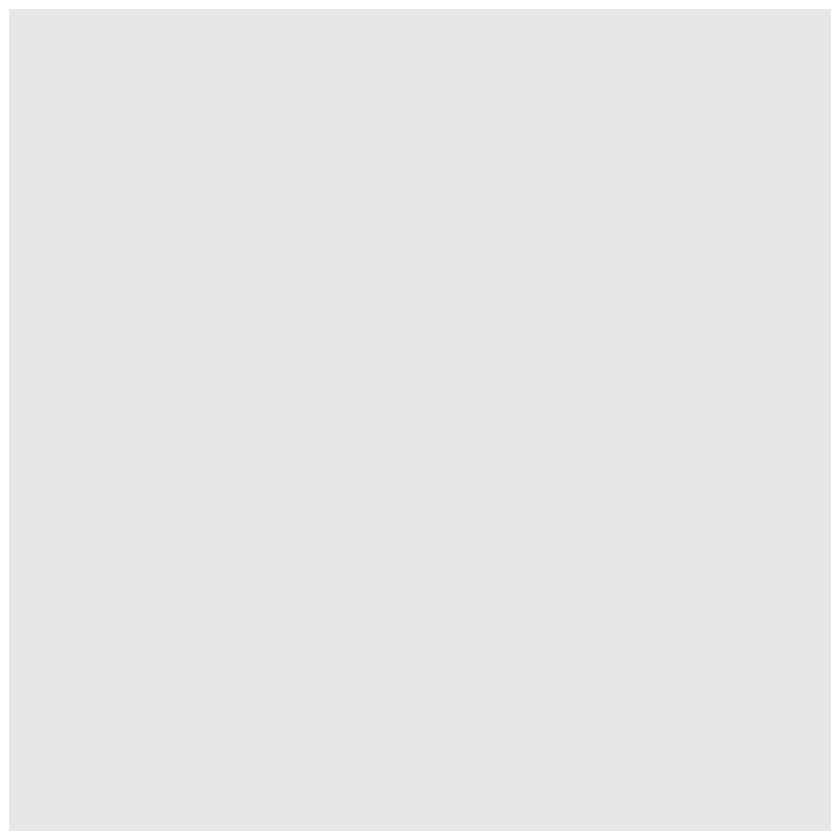

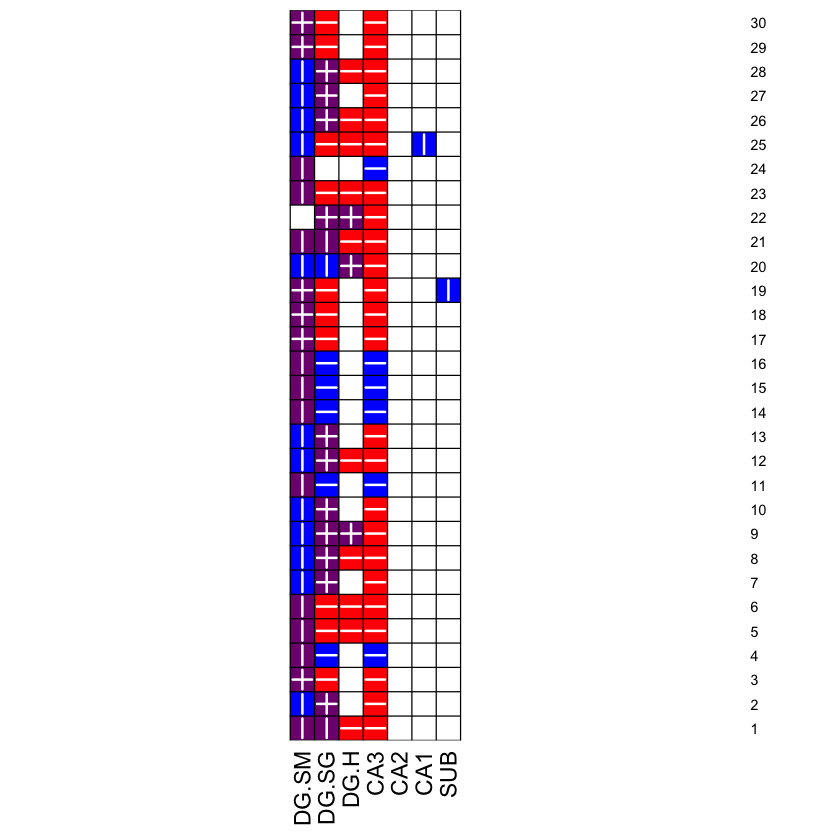

In [16]:
## plot matrix ##

morphologyHeatmap <- ggplot(data = morphologyMatrix)

morphologyHeatmap

morphologyInvasion <- data.matrix(morphologyMatrix)

morphologyInvasionHeatmap <- heatmap(morphologyInvasion, Rowv = NA, Colv = NA, col = morphologyColors, asp = 1,
                                   add.expr = hatch_lines(morphologyInvasion, nNeurons, nParcels))